<a href="https://colab.research.google.com/github/JAYAM27/ASSIGNMENT-10_KNN_CLASSIFIER/blob/main/Assignment__10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, plot_confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from scipy.spatial import distance


In [ ]:
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', names = column_names)

In [ ]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.shape

(214, 11)

In [ ]:
df.head(5).style.background_gradient()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000,1
1,2,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1
2,3,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1
3,4,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000,1
4,5,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
df.describe().style.background_gradient(cmap = 'afmhot')

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.nunique()

Id               214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

In [ ]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [ ]:
y = df['Type of glass']
X = df.drop('Type of glass', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(149, 10) (65, 10)
(149,) (65,)


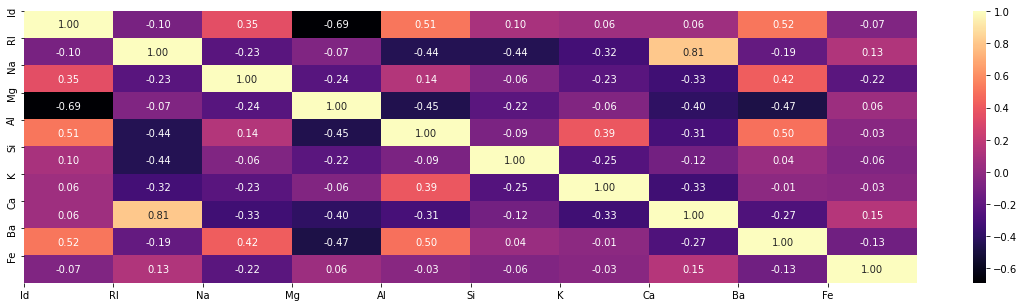

In [ ]:
corr = X_train.corr() 
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

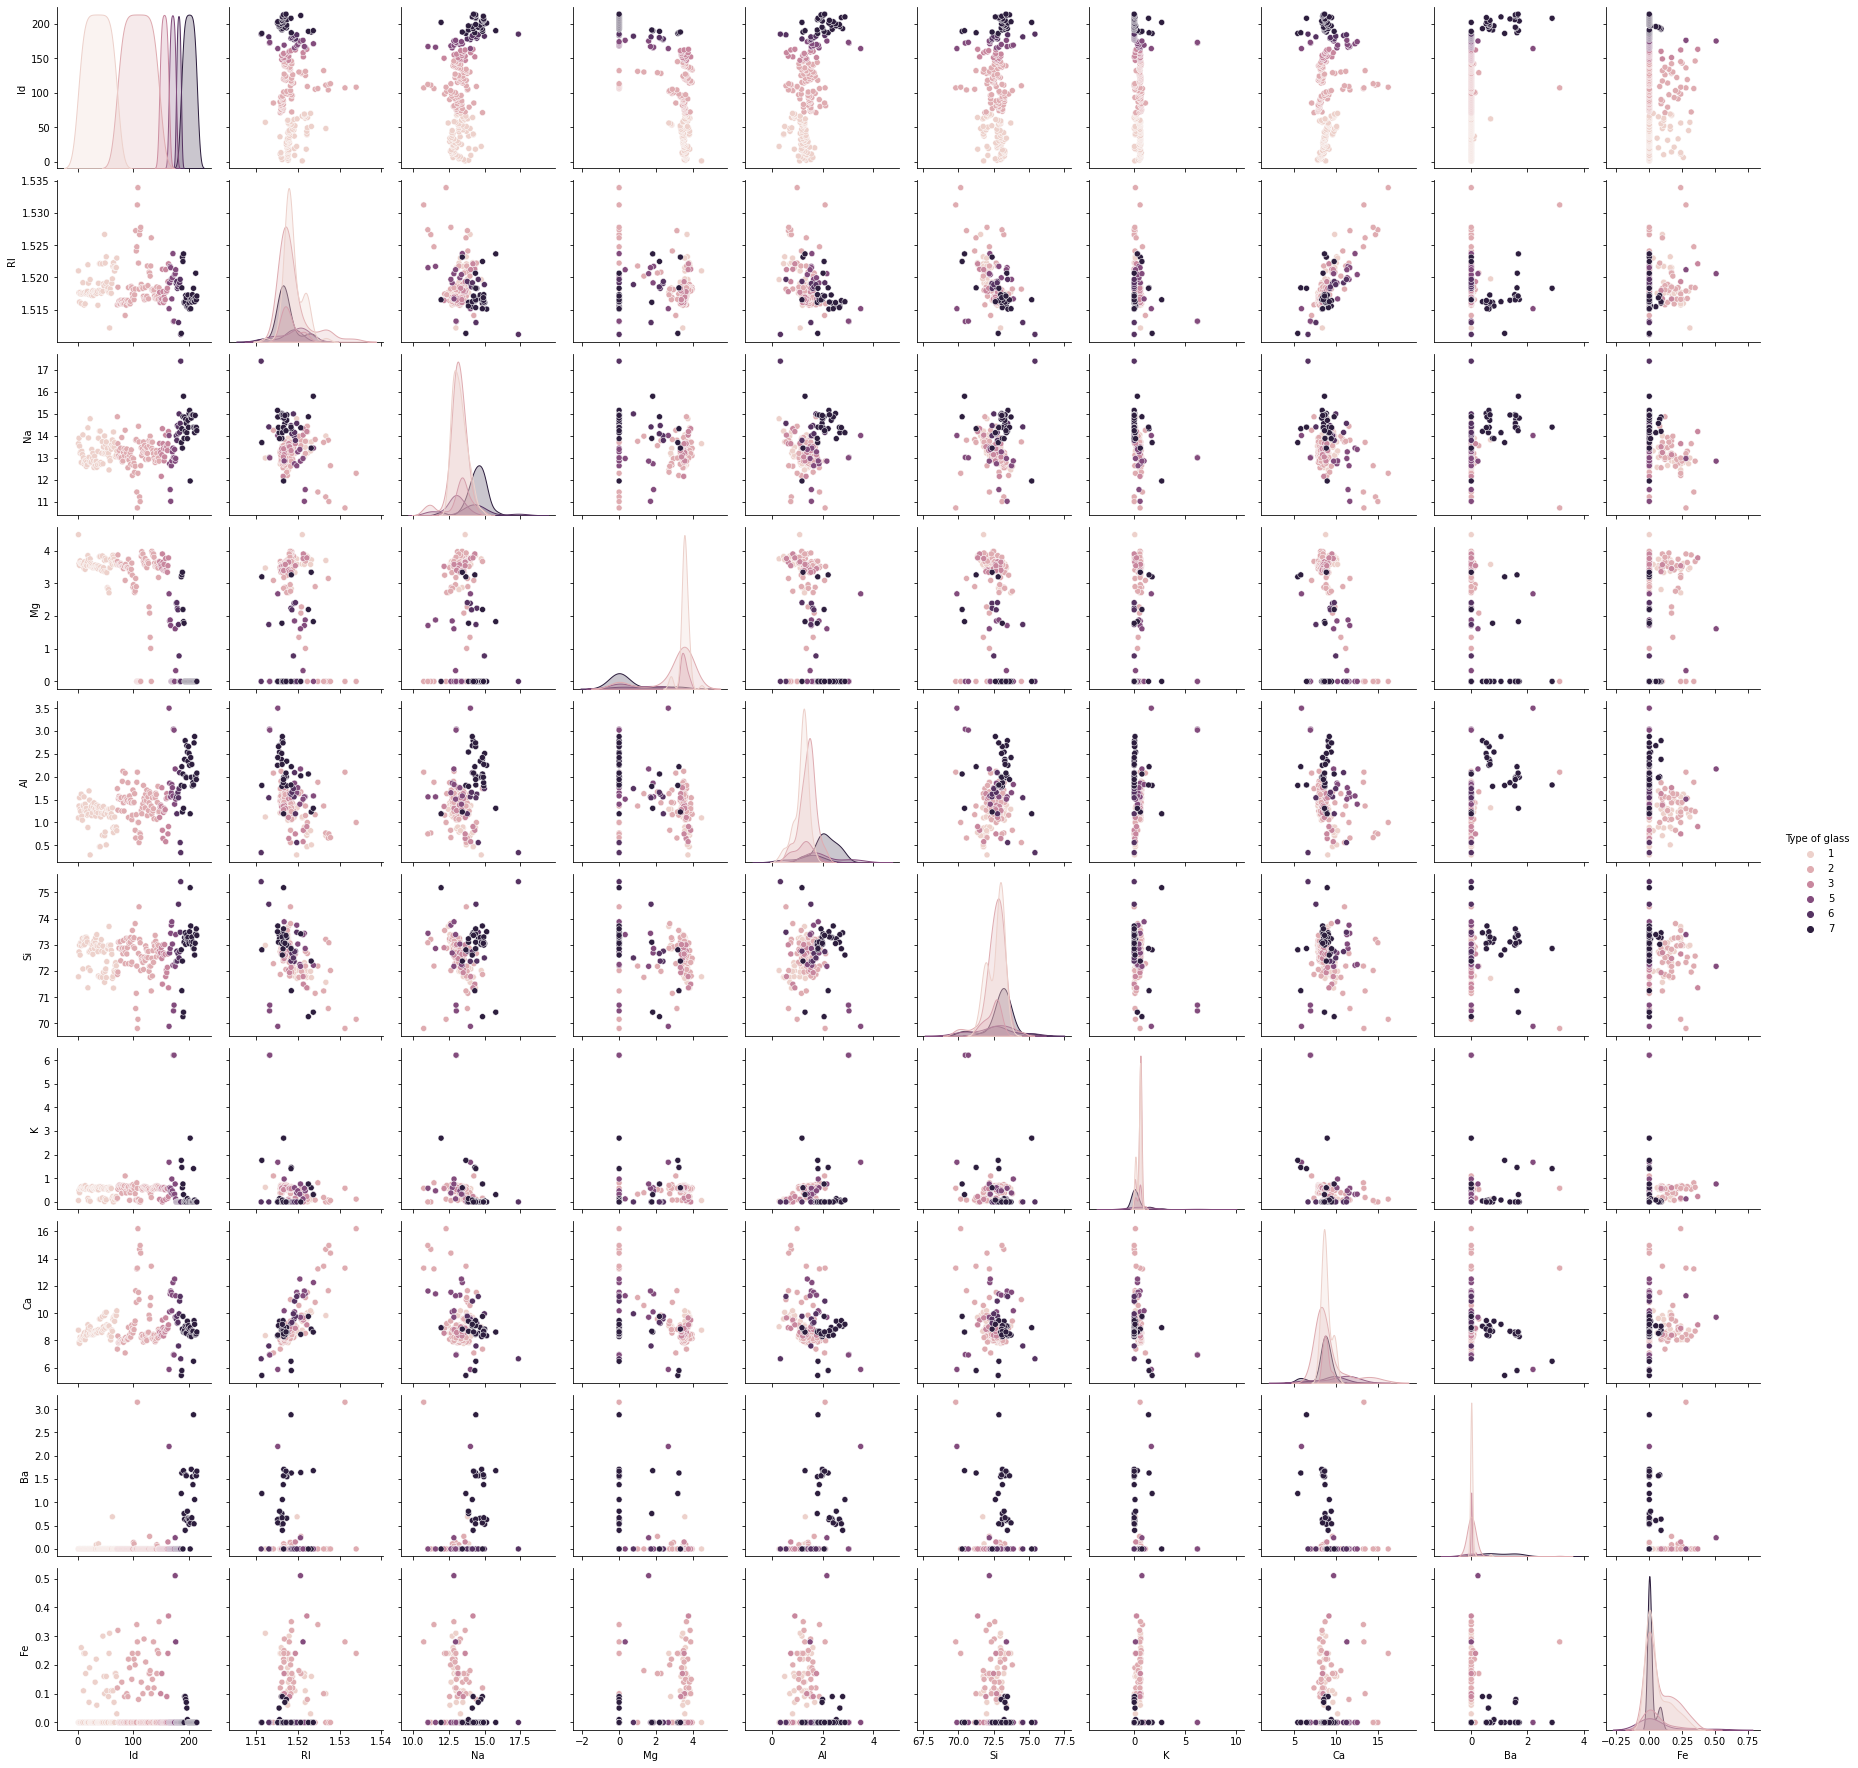

In [ ]:
sns.pairplot(df, hue='Type of glass')
plt.show()

In [ ]:
def correlation(df, threshold):
  col_corr = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [ ]:
corr_feat = correlation(X_train, 0.6)
len(set(corr_feat))

1

In [ ]:
corr_feat

{'Ca'}

In [ ]:
X_train = X_train.drop(corr_feat, axis = 1)
X_test = X_test.drop(corr_feat, axis = 1)

In [ ]:
X_train.head()

,Id,RI,Na,Mg,Al,Si,K,Ba,Fe
111,112,1.52739,11.02,0.00,0.75,73.08,0.00,0.0,0.00
159,160,1.51796,13.50,3.36,1.63,71.94,0.57,0.0,0.09
24,25,1.51720,13.38,3.50,1.15,72.85,0.50,0.0,0.00
30,31,1.51768,12.65,3.56,1.30,73.08,0.61,0.0,0.14
60,61,1.51905,13.60,3.62,1.11,72.64,0.14,0.0,0.00


In [ ]:
X_test.head()

,Id,RI,Na,Mg,Al,Si,K,Ba,Fe
197,198,1.51727,14.70,0.00,2.34,73.28,0.00,0.66,0.00
37,38,1.51797,12.74,3.48,1.35,72.96,0.64,0.00,0.00
89,90,1.51640,12.55,3.48,1.87,73.23,0.63,0.00,0.09
176,177,1.51905,14.00,2.39,1.56,72.37,0.00,0.00,0.00
170,171,1.52369,13.44,0.00,1.58,72.22,0.32,0.00,0.00


In [ ]:
ss = StandardScaler()

In [ ]:
X_train = ss.fit_transform(X_train)

In [ ]:
X_test = ss.transform(X_test)

KNN MODEL CREATED FOR SQUARE EUCLIDEAN DISTANCE

In [ ]:
KNN_euc = KNeighborsClassifier(n_neighbors = 10, metric = distance.sqeuclidean)
KNN_euc.fit(X_train, y_train)


KNeighborsClassifier(metric=<function sqeuclidean at 0x7f77f1891d40>,
                     n_neighbors=10)

In [ ]:
y_euc_pred = KNN_euc.predict(X_test)

KNN MODEL CREATED FOR MANHATN DISTANCE - CITYBLOCK

In [ ]:
KNN_MAN = KNeighborsClassifier(n_neighbors = 10, metric = distance.cityblock)
KNN_MAN.fit(X_train, y_train)

KNeighborsClassifier(metric=<function cityblock at 0x7f77f1895170>,
                     n_neighbors=10)

In [ ]:
y_man_pred = KNN_MAN.predict(X_test)

In [ ]:
df = pd.DataFrame({'actual': y_test, 'manhattan': y_man_pred, 'euclidean': y_euc_pred})
df.head()

,actual,manhattan,euclidean
197,7,7,7
37,1,1,1
89,2,2,2
176,6,6,6
170,5,5,5


In [ ]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, y_man_pred, zero_division = 0, target_names=df['actual'].astype(str).unique()))


Manhattan Accuracy: 81.54%
              precision    recall  f1-score   support

           7       0.78      1.00      0.88        21
           1       0.79      0.85      0.81        26
           2       0.00      0.00      0.00         7
           6       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7

    accuracy                           0.82        65
   macro avg       0.76      0.72      0.73        65
weighted avg       0.73      0.82      0.77        65



In [ ]:
euclidean_count = len(df.loc[df['euclidean'] == df['actual']])
print('Square Euclidean Accuracy: {}%'.format(round(100*euclidean_count/len(df), 2)))
print(classification_report(y_test, y_euc_pred, zero_division = 0, target_names=df['actual'].astype(str).unique()))

Square Euclidean Accuracy: 80.0%
              precision    recall  f1-score   support

           7       0.81      1.00      0.89        21
           1       0.73      0.85      0.79        26
           2       0.00      0.00      0.00         7
           6       1.00      0.50      0.67         2
           5       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         7

    accuracy                           0.80        65
   macro avg       0.76      0.64      0.67        65
weighted avg       0.72      0.80      0.75        65

